<div style="display: flex; background-color: RGB(255,114,0); padding: 30px;" >

# Weather
</div>
by : Ellande, Vincent et Aurélie

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Mission 
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import time
from collections import defaultdict
from os import getcwd, listdir
from os.path import isfile, join, exists, getsize
import vae_weather as vae_w
from PIL import Image
import re
import seaborn as sns


<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.Chargement des données
</div>

https://medium.com/analytics-vidhya/create-your-own-real-image-dataset-with-python-deep-learning-b2576b63da1e   

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
force_reloading = True

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
file_path

'c:\\Users\\User\\WORK\\workspace-ia\\PROJETS\\vae_weather_picture\\'

In [3]:
source_data_path = file_path+"dataset\\"
print("Source path :", source_data_path)

Source path : c:\Users\User\WORK\workspace-ia\PROJETS\vae_weather_picture\dataset\


<div style="display: flex; background-color: Green; padding: 7px;" >

### Liste des images à récupérer
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### Charger les images dans une DF
</div>

In [4]:
# récupération données
img_extensions = [".jpg", ".jpeg", ".png"]
images = []

for ext in img_extensions:
    images.extend(vae_w.get_dir_files(source_data_path, endwith=ext))

print(len(images))
images

400


['cloudy1.jpg',
 'cloudy10.jpg',
 'cloudy100.jpg',
 'cloudy11.jpg',
 'cloudy12.jpg',
 'cloudy13.jpg',
 'cloudy14.jpg',
 'cloudy15.jpg',
 'cloudy16.jpg',
 'cloudy17.jpg',
 'cloudy18.jpg',
 'cloudy19.jpg',
 'cloudy2.jpg',
 'cloudy20.jpg',
 'cloudy21.jpg',
 'cloudy22.jpg',
 'cloudy23.jpg',
 'cloudy24.jpg',
 'cloudy25.jpg',
 'cloudy26.jpg',
 'cloudy27.jpg',
 'cloudy28.jpg',
 'cloudy29.jpg',
 'cloudy3.jpg',
 'cloudy30.jpg',
 'cloudy31.jpg',
 'cloudy32.jpg',
 'cloudy33.jpg',
 'cloudy34.jpg',
 'cloudy35.jpg',
 'cloudy36.jpg',
 'cloudy37.jpg',
 'cloudy38.jpg',
 'cloudy39.jpg',
 'cloudy4.jpg',
 'cloudy40.jpg',
 'cloudy41.jpg',
 'cloudy42.jpg',
 'cloudy43.jpg',
 'cloudy44.jpg',
 'cloudy45.jpg',
 'cloudy46.jpg',
 'cloudy47.jpg',
 'cloudy48.jpg',
 'cloudy49.jpg',
 'cloudy5.jpg',
 'cloudy50.jpg',
 'cloudy51.jpg',
 'cloudy52.jpg',
 'cloudy53.jpg',
 'cloudy54.jpg',
 'cloudy55.jpg',
 'cloudy56.jpg',
 'cloudy57.jpg',
 'cloudy58.jpg',
 'cloudy59.jpg',
 'cloudy6.jpg',
 'cloudy60.jpg',
 'cloudy61.jpg',
 '

In [5]:
img_dic = defaultdict(list)

pattern = vae_w.get_regex_alphabetique_simple()

for img_path in images:
    img_dic["file_name"].append(img_path)
    name = img_path.lower().split(".")[0]
    name = re.sub(pattern, '', name).strip()
    img_dic["y"].append(name)
    
    im = Image.open(source_data_path + img_path)
    im_resize = im.resize((620, 413))
    img_dic["width"].append(im.size[0])
    img_dic["higth"].append(im.size[1])
    img_dic["format"].append(im.format)
    img_dic["mode"].append(im.mode)
    img_dic["Ratio"].append(round(im.size[1]/im.size[0], 2))
    img_dic["img"].append(np.asarray(im))
    img_dic["img_resize"].append(np.asarray(im_resize))
    img_grey = im_resize.convert('L')
    grey = np.asarray(img_grey)
    img_dic["img_resize_bw"].append(grey)
    
    im_array_reshape = np.reshape(grey,(grey.shape[0]*grey.shape[1]))
    img_dic["img_r_bw_reshape"].append(im_array_reshape)
    i = 0
    for pixel in im_array_reshape:
        i += 1
        img_dic["Pixel_"+str(i)].append(pixel)
    img_dic["img_r_bw_reshape_size"].append(im_array_reshape.shape)


In [6]:
df_origin = pd.DataFrame.from_dict(img_dic)
print(df_origin.shape)
df_origin.columns

(400, 256072)


Index(['file_name', 'y', 'width', 'higth', 'format', 'mode', 'Ratio', 'img',
       'img_resize', 'img_resize_bw',
       ...
       'Pixel_256052', 'Pixel_256053', 'Pixel_256054', 'Pixel_256055',
       'Pixel_256056', 'Pixel_256057', 'Pixel_256058', 'Pixel_256059',
       'Pixel_256060', 'img_r_bw_reshape_size'],
      dtype='object', length=256072)

In [7]:
df_origin.head()

,file_name,y,width,higth,format,mode,Ratio,img,img_resize,img_resize_bw,...,Pixel_256052,Pixel_256053,Pixel_256054,Pixel_256055,Pixel_256056,Pixel_256057,Pixel_256058,Pixel_256059,Pixel_256060,img_r_bw_reshape_size
0,cloudy1.jpg,cloudy,600,400,JPEG,RGB,0.67,"[[[125, 125, 125], [126, 126, 126], [128, 128,...","[[[125, 125, 125], [126, 126, 126], [128, 128,...","[[125, 126, 128, 131, 132, 133, 134, 134, 134,...",...,52,53,53,53,53,53,54,54,55,"(256060,)"
1,cloudy10.jpg,cloudy,271,186,JPEG,RGB,0.69,"[[[177, 192, 223], [171, 186, 217], [169, 184,...","[[[179, 194, 225], [177, 192, 223], [175, 190,...","[[193, 191, 189, 186, 184, 184, 185, 188, 190,...",...,-116,-116,-117,-117,-118,-119,-119,-119,-119,"(256060,)"
2,cloudy100.jpg,cloudy,259,194,JPEG,RGB,0.75,"[[[135, 135, 145], [138, 138, 148], [141, 143,...","[[[135, 135, 145], [135, 135, 145], [136, 136,...","[[136, 136, 137, 139, 141, 143, 145, 147, 148,...",...,70,68,67,68,73,76,78,78,78,"(256060,)"
3,cloudy11.jpg,cloudy,1024,675,JPEG,RGB,0.66,"[[[186, 185, 191], [179, 178, 184], [172, 171,...","[[[184, 183, 189], [173, 172, 178], [161, 160,...","[[184, 173, 161, 152, 156, 155, 159, 160, 155,...",...,71,103,93,105,83,95,116,116,104,"(256060,)"
4,cloudy12.jpg,cloudy,300,168,JPEG,RGB,0.56,"[[[36, 38, 51], [38, 40, 53], [40, 42, 55], [4...","[[[36, 38, 51], [36, 38, 51], [37, 39, 52], [3...","[[39, 39, 40, 41, 42, 43, 44, 44, 44, 44, 42, ...",...,56,52,50,49,46,43,40,39,38,"(256060,)"


In [9]:
df_origin.loc[1, "img_resize_bw"]

array([[193, 191, 189, ..., 166, 167, 167],
       [191, 189, 187, ..., 164, 165, 165],
       [187, 185, 182, ..., 162, 163, 163],
       ...,
       [ 40,  34,  21, ..., 137, 137, 137],
       [ 40,  34,  21, ..., 137, 137, 137],
       [ 40,  34,  21, ..., 137, 137, 137]], dtype=uint8)

In [10]:
df_origin.loc[1, "img_r_bw_reshape"]

array([193, 191, 189, ..., 137, 137, 137], dtype=uint8)

In [15]:
df_origin.loc[1, "Pixel_1"]

-63

In [16]:
df_origin_info = df_origin[['file_name', 'y', 'width', 'higth', 'format', 'mode', 'Ratio']]

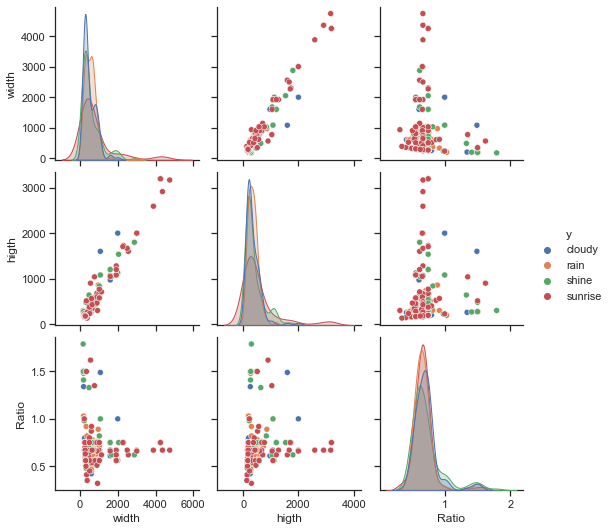

In [17]:
sns.set_theme(style="ticks")
sns.pairplot(df_origin_info, hue="y")

array([[<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'higth'}>],
       [<AxesSubplot:title={'center':'Ratio'}>, <AxesSubplot:>]],
      dtype=object)

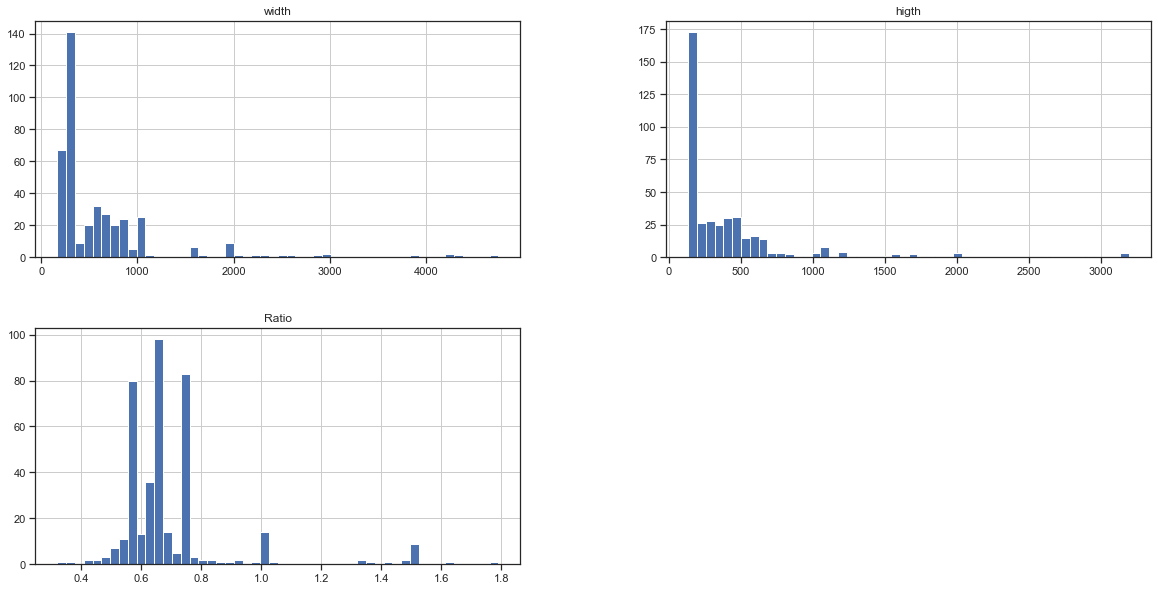

In [18]:
df_origin_info.hist(figsize=(20,10),bins=50)

C:\Program Files\Python39\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


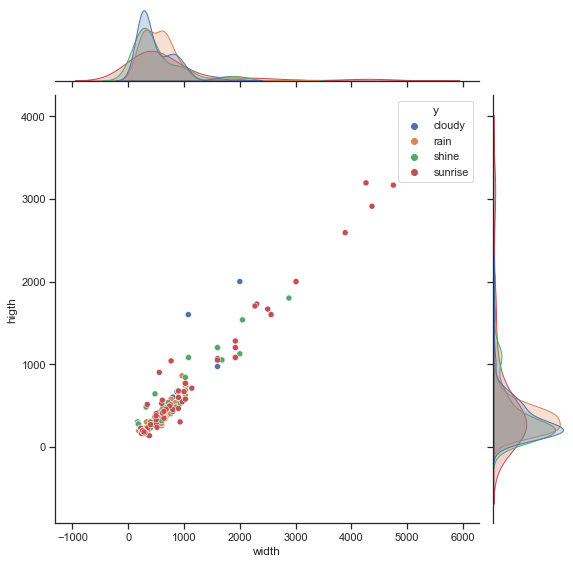

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [19]:
sns.jointplot(data=df_origin_info, x="width",y="higth", hue="y",size=8)
plt.ylabel("higth")
plt.xlabel("width")
plt.show()
sns.despine

<div style="display: flex; background-color: green;" >

## 1.3. Visualisation des outliers
</div>


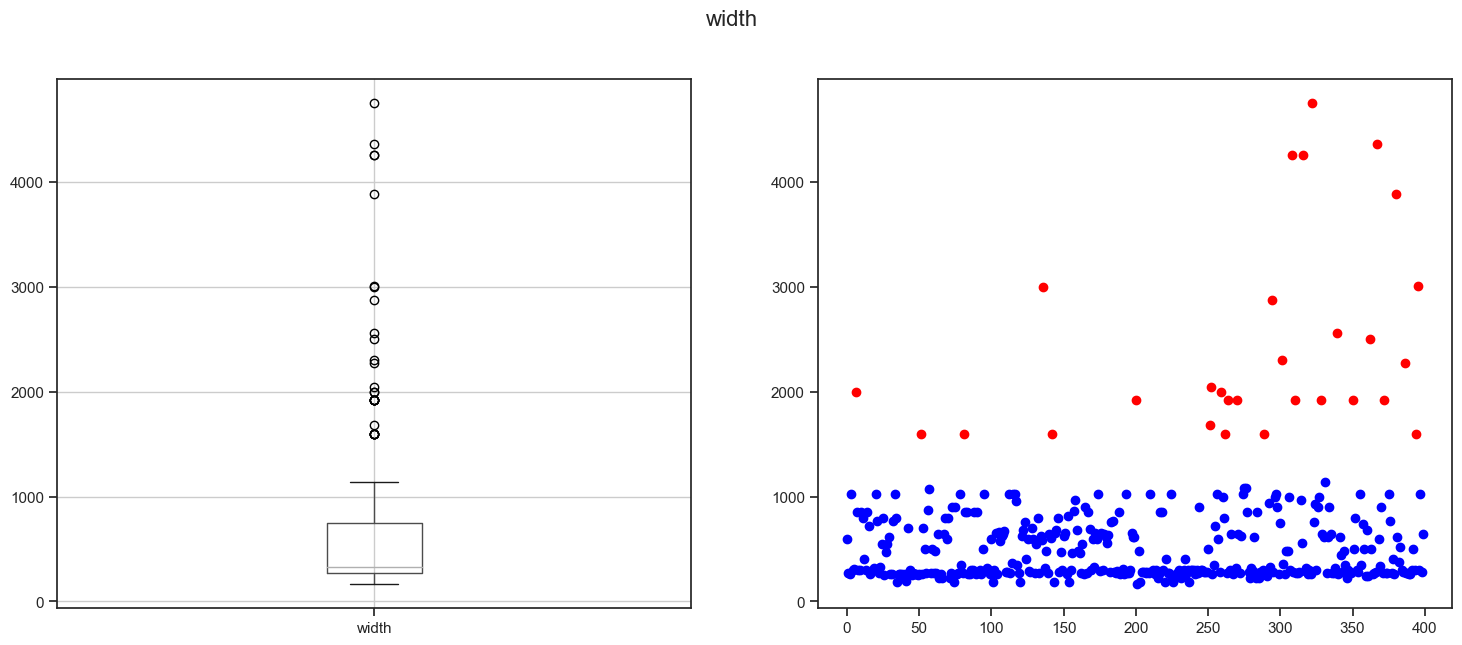

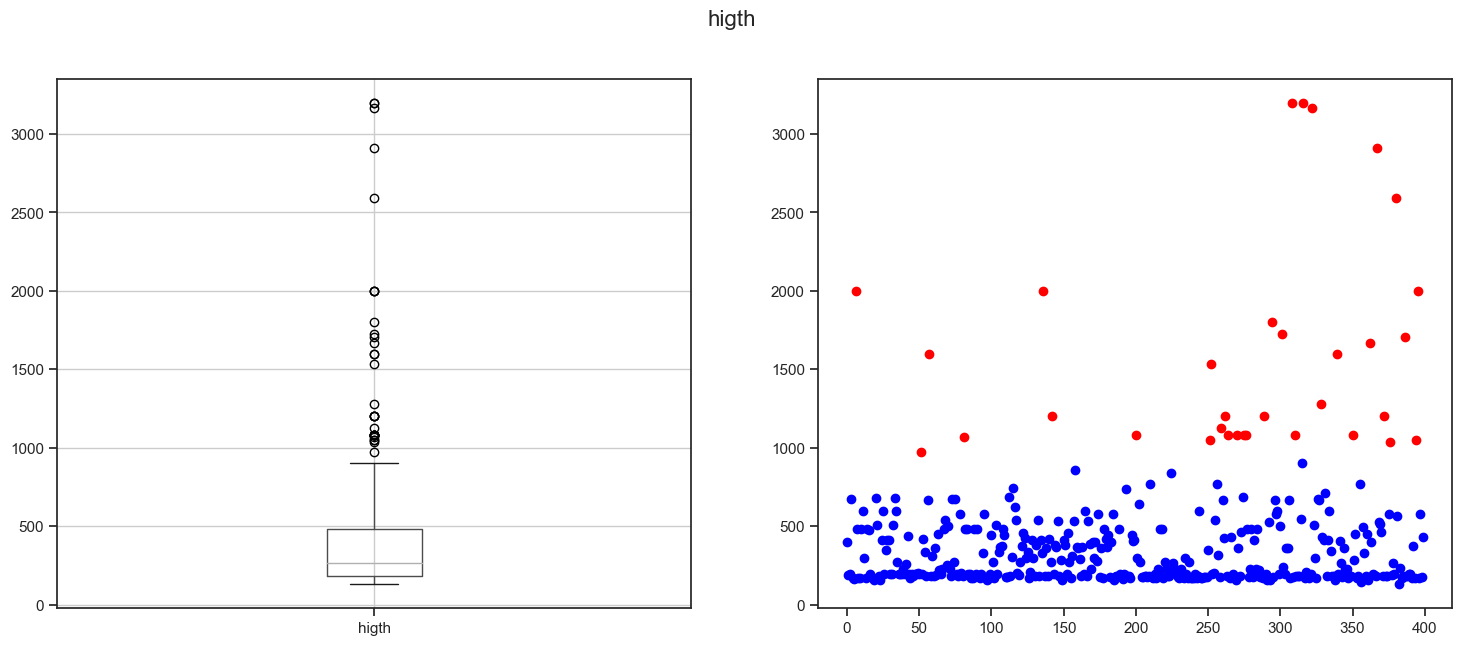

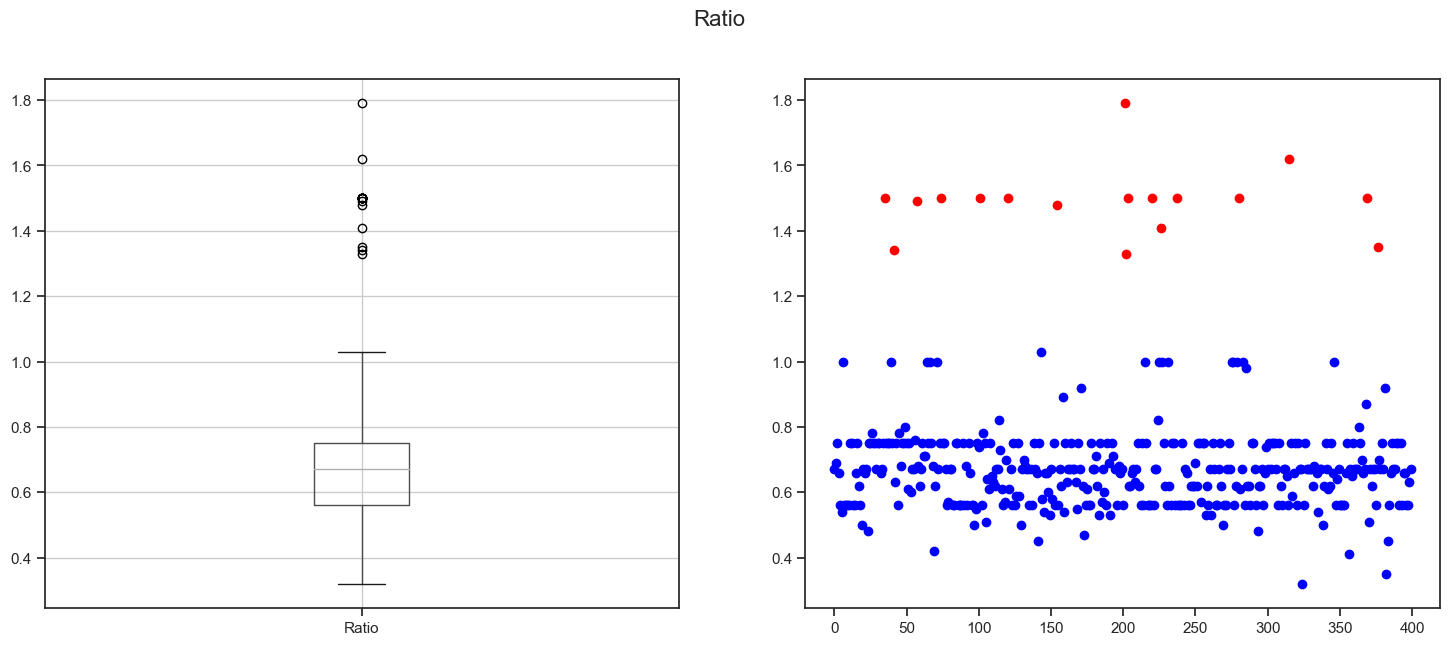

In [ ]:
cols = vae_w.get_numeric_columns_names(df_origin_info)
for column_name in cols:
    q_low, q_hi,iqr, q_min, q_max = vae_w.get_outliers_datas(df_origin_info, column_name)
    vae_w.graphe_outliers(df_origin_info, column_name, q_min, q_max)

<div style="display: flex; background-color: Green; padding: 7px;" >

### TSNE
</div>

In [20]:
df_origin.columns

Index(['file_name', 'y', 'width', 'higth', 'format', 'mode', 'Ratio', 'img',
       'img_resize', 'img_resize_bw',
       ...
       'Pixel_256052', 'Pixel_256053', 'Pixel_256054', 'Pixel_256055',
       'Pixel_256056', 'Pixel_256057', 'Pixel_256058', 'Pixel_256059',
       'Pixel_256060', 'img_r_bw_reshape_size'],
      dtype='object', length=256072)

In [21]:
cols = list(df_origin.columns)
cols.remove('file_name')
cols.remove('y')
cols.remove('width')
cols.remove('higth')
cols.remove('format')
cols.remove('mode')
cols.remove('Ratio')
cols.remove('img')
cols.remove('img_resize')
cols.remove('img_resize_bw')
cols.remove('img_r_bw_reshape')
cols.remove('img_r_bw_reshape_size')
cols

['Pixel_1',
 'Pixel_2',
 'Pixel_3',
 'Pixel_4',
 'Pixel_5',
 'Pixel_6',
 'Pixel_7',
 'Pixel_8',
 'Pixel_9',
 'Pixel_10',
 'Pixel_11',
 'Pixel_12',
 'Pixel_13',
 'Pixel_14',
 'Pixel_15',
 'Pixel_16',
 'Pixel_17',
 'Pixel_18',
 'Pixel_19',
 'Pixel_20',
 'Pixel_21',
 'Pixel_22',
 'Pixel_23',
 'Pixel_24',
 'Pixel_25',
 'Pixel_26',
 'Pixel_27',
 'Pixel_28',
 'Pixel_29',
 'Pixel_30',
 'Pixel_31',
 'Pixel_32',
 'Pixel_33',
 'Pixel_34',
 'Pixel_35',
 'Pixel_36',
 'Pixel_37',
 'Pixel_38',
 'Pixel_39',
 'Pixel_40',
 'Pixel_41',
 'Pixel_42',
 'Pixel_43',
 'Pixel_44',
 'Pixel_45',
 'Pixel_46',
 'Pixel_47',
 'Pixel_48',
 'Pixel_49',
 'Pixel_50',
 'Pixel_51',
 'Pixel_52',
 'Pixel_53',
 'Pixel_54',
 'Pixel_55',
 'Pixel_56',
 'Pixel_57',
 'Pixel_58',
 'Pixel_59',
 'Pixel_60',
 'Pixel_61',
 'Pixel_62',
 'Pixel_63',
 'Pixel_64',
 'Pixel_65',
 'Pixel_66',
 'Pixel_67',
 'Pixel_68',
 'Pixel_69',
 'Pixel_70',
 'Pixel_71',
 'Pixel_72',
 'Pixel_73',
 'Pixel_74',
 'Pixel_75',
 'Pixel_76',
 'Pixel_77',
 'Pixel_

In [22]:
X_train = df_origin[cols]

<div style="display: flex; background-color: Green; padding: 7px;" >

### Titre 2
</div>

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42, n_components=2,verbose=1, perplexity=40, n_iter=300, init='random', learning_rate=200.0).fit_transform(X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.181s...
[t-SNE] Computed neighbors for 400 samples in 6.680s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 15629.988089
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.729408
[t-SNE] KL divergence after 300 iterations: 1.884707


In [24]:
df = df_origin.copy()
df = df[['file_name', 'y']]
df["comp-1"] = tsne[:, 0]
df["comp-2"] = tsne[:, 1]
rows, cols = df.shape

In [25]:
nb_y = df["y"].nunique()
nb_y

4

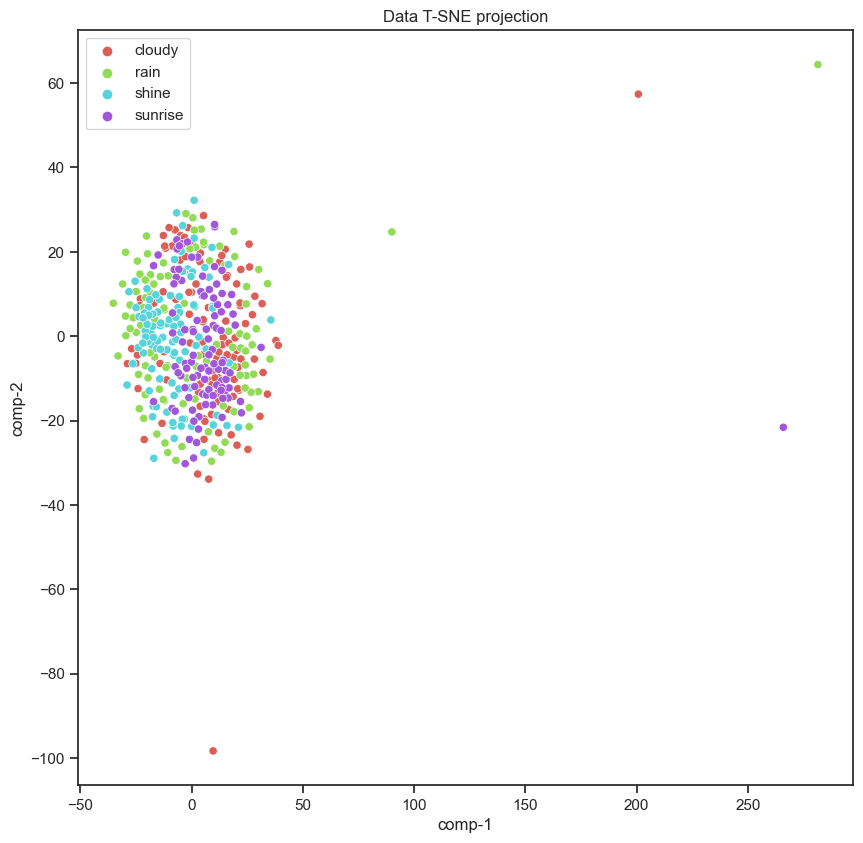

In [26]:
figure, axe = vae_w.color_graph_background()
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", nb_y),
                data=df).set(title="Data T-SNE projection")
figure.set_size_inches(10, 10, forward=True)
figure.set_dpi(100)

<div style="display: flex; background-color: Green; padding: 7px;" >

### Titre 2
</div>

<div style="display: flex; background-color: indigo;" >

####  Titre 3
</div>

<div style="display: flex; background-color: Blue; padding: 15px;" >

## EDA
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

###  Titre 2
</div>

<div style="display: flex; background-color: indigo;" >

####  Titre 3
</div>

<div style="display: flex; background-color: Blue; padding: 15px;" >

# ANNEXES
</div>

In [ ]:
just to fail

<div style="display: flex; background-color: Green; padding: 7px;" >

###  Titre 2
</div>

<div style="display: flex; background-color: indigo;" >

####  Titre 3
</div>